In [1]:
import PIL
from PIL import Image
import numpy as np
import os 
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras import regularizers

Using TensorFlow backend.
/home/jan/anaconda3/envs/tf-gpu-clone/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jan/anaconda3/envs/tf-gpu-clone/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jan/anaconda3/envs/tf-gpu-clone/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jan/a

In [2]:
class SmallVGGNet:
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
        
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
            
        #if K.image_data_format() == 'channels_first':
        #    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        #    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        #    print(x_train.shape)
        #    input_shape = (1, img_rows, img_cols)
        #else:
        #    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        #    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        #    input_shape = (img_rows, img_cols, 1)
            
            
        model.add(Conv2D(32,(3,3), padding="same", input_shape = inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis = chanDim))
        model.add(MaxPooling2D(pool_size = (2,2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        #model.add(Conv2D(128, (3, 3), padding="same"))
        #model.add(Activation("relu"))
        #model.add(BatchNormalization(axis=chanDim))
        #model.add(Conv2D(128, (3, 3), padding="same"))
        #model.add(Activation("relu"))
        #model.add(BatchNormalization(axis=chanDim))
        #model.add(Conv2D(128, (3, 3), padding="same"))
        #model.add(Activation("relu"))
        #model.add(BatchNormalization(axis=chanDim))
        #model.add(MaxPooling2D(pool_size=(2, 2)))
        #model.add(Dropout(0.25))
        
       # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(256))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
 
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("sigmoid"))
 
        # return the constructed network architecture
        return model

In [73]:
class ownCNN:
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
        
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
            
        model.add(Conv2D(3,(6,6), padding="same", input_shape = inputShape))   #, kernel_regularizer=regularizers.l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis = chanDim))
        model.add(MaxPooling2D(pool_size = (2,2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(6, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Dropout(0.25))
        #model.add(MaxPooling2D(pool_size = (2,2))) 
        
        #model.add(Conv2D(32, (3, 3), padding="same"))
        #model.add(Activation("relu"))
        #model.add(BatchNormalization(axis=chanDim))
        #model.add(Dropout(0.25))
        
        #model.add(Conv2D(64, (3, 3), padding="same"))
        #model.add(Activation("relu"))
        #model.add(BatchNormalization(axis=chanDim))
                
        #model.add(Conv2D(128, (3, 3), padding="same"))
        #model.add(Activation("relu"))
        #model.add(BatchNormalization(axis=chanDim))
                
                
       # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(32))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
 
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("sigmoid"))
 
        # return the constructed network architecture
        return model

In [6]:
dirs = ['/media/jan/Volume_big/datasets/Second_try/Grid_size_874_binary/3layer/no_porosity',
        '/media/jan/Volume_big/datasets/Second_try/Grid_size_874_binary/3layer/porosity']

length = 6000
image_paths = []
labels = []
data = []

In [7]:
for d in dirs: 
    cur_paths = []
    for path in os.listdir(d):
        full_path = os.path.join(d,path)
        cur_paths.append(full_path)
        
    random.seed(42)
    random.shuffle(cur_paths)
    cur_paths = cur_paths[:length]
    
    image_paths.append(cur_paths)        

image_paths = [val for sublist in image_paths for val in sublist]
random.seed(42)
random.shuffle(image_paths)

######
for path in image_paths:
    label = path.split(os.path.sep)[-2]
    labels.append(label)
    
    array = np.load(path)
    img = Image.fromarray(array)
    img = img.resize((128, 128), PIL.Image.LANCZOS)
    array_resized_flattened = np.array(img)
    data.append(array_resized_flattened)
    
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
trainY = np.hstack((trainY, 1- trainY))

testY = lb.transform(testY)
testY = np.hstack((testY, 1- testY))

In [8]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(9000, 128, 128, 3)
(9000, 2)
(3000, 128, 128, 3)
(3000, 2)


In [85]:
model2 = SmallVGGNet.build(width=128, height=128, depth=3, classes=len(lb.classes_))

In [86]:
INIT_LR = 0.001
EPOCHS = 80
BS = 32

print("[INFO] training network...")
opt = Adam(lr = INIT_LR)#, decay=INIT_LR / EPOCHS) # SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [87]:
aug = ImageDataGenerator(vertical_flip= True,horizontal_flip=True)

In [88]:
H = model2.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS)

Epoch 1/80
281/281 [==============================] - 15s 55ms/step - loss: 0.6921 - acc: 0.6392 - val_loss: 0.5487 - val_acc: 0.7168
Epoch 2/80
281/281 [==============================] - 12s 43ms/step - loss: 0.5954 - acc: 0.6780 - val_loss: 0.5499 - val_acc: 0.7130
Epoch 3/80
281/281 [==============================] - 12s 44ms/step - loss: 0.5763 - acc: 0.6799 - val_loss: 0.5391 - val_acc: 0.6993
Epoch 4/80
281/281 [==============================] - 12s 43ms/step - loss: 0.5591 - acc: 0.6935 - val_loss: 0.5282 - val_acc: 0.7180
Epoch 5/80
281/281 [==============================] - 12s 44ms/step - loss: 0.5468 - acc: 0.7047 - val_loss: 0.5910 - val_acc: 0.6738
Epoch 6/80
281/281 [==============================] - 12s 42ms/step - loss: 0.5473 - acc: 0.7030 - val_loss: 0.5458 - val_acc: 0.6998
Epoch 7/80
281/281 [==============================] - 12s 43ms/step - loss: 0.5419 - acc: 0.7057 - val_loss: 0.5185 - val_acc: 0.7272
Epoch 8/80
281/281 [==============================] - 12s 43ms

Epoch 62/80
281/281 [==============================] - 12s 43ms/step - loss: 0.3298 - acc: 0.8550 - val_loss: 0.6077 - val_acc: 0.7310
Epoch 63/80
281/281 [==============================] - 12s 43ms/step - loss: 0.3270 - acc: 0.8571 - val_loss: 0.6165 - val_acc: 0.7423
Epoch 64/80
281/281 [==============================] - 12s 43ms/step - loss: 0.2933 - acc: 0.8753 - val_loss: 0.6267 - val_acc: 0.7300
Epoch 65/80
281/281 [==============================] - 12s 43ms/step - loss: 0.2975 - acc: 0.8721 - val_loss: 0.6344 - val_acc: 0.7190
Epoch 66/80
281/281 [==============================] - 12s 43ms/step - loss: 0.3007 - acc: 0.8753 - val_loss: 0.6360 - val_acc: 0.7417
Epoch 67/80
281/281 [==============================] - 12s 43ms/step - loss: 0.2920 - acc: 0.8771 - val_loss: 0.6696 - val_acc: 0.7323
Epoch 68/80
281/281 [==============================] - 12s 43ms/step - loss: 0.2679 - acc: 0.8882 - val_loss: 0.8097 - val_acc: 0.7397
Epoch 69/80
281/281 [==============================] - 

[INFO] evaluating network...
              precision    recall  f1-score   support

 no_porosity       0.73      0.71      0.72      1479
    porosity       0.73      0.74      0.73      1521

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000



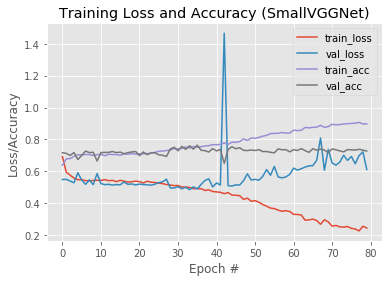

In [89]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model2.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))
 
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

In [84]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 128, 128, 3)       327       
_________________________________________________________________
activation_53 (Activation)   (None, 128, 128, 3)       0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 128, 128, 3)       12        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 3)         0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 64, 64, 6)         168       
_________________________________________________________________
activation_54 (Activation)   (None, 64, 64, 6)         0         
__________

In [ ]:
model2.save('ownCNN')